Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Response_named = 
[['capital' '-8.086766450813688' '-7.980679419154916' ...
  '0.862067359674995' '1.0292651206148125' '1.2958054058818684']
 ['consumption' '-5.819647884069548' '-5.434057937887248' ...
  '0.7960130840402225' '1.135350287057409' '1.563997050800566']
 ['output' '-6.630377338725713' '-5.026179226145901' ...
  '1.5684687972125095' '2.7800792400350662' '4.160558091699091']
 ...
 ['interest' '0.04981221648907613' '0.10635540605721905' ...
  '0.027172954752205318' '0.06665091284251098' '0.10881243074517691']
 ['investment' '-8.981583748188719' '-3.8432851844628164' ...
  '3.808677060778378' '7.549977797267685' '11.690876531297052']
 ['technology'

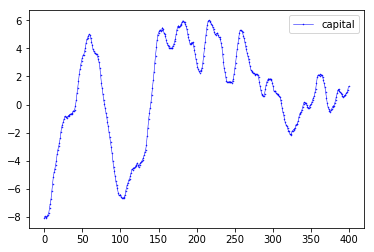

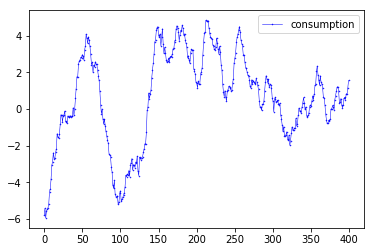

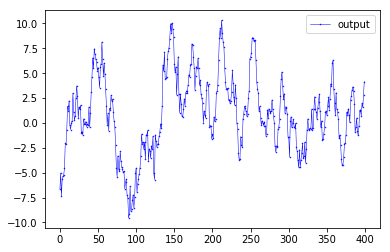

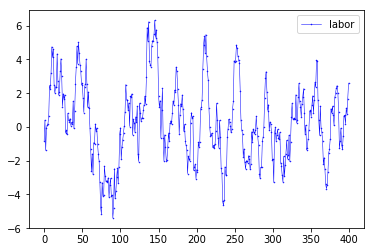

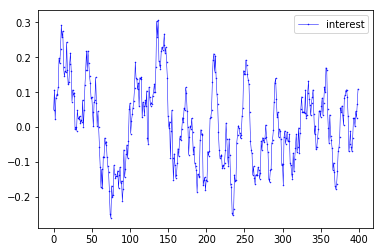

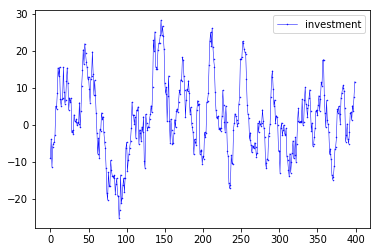

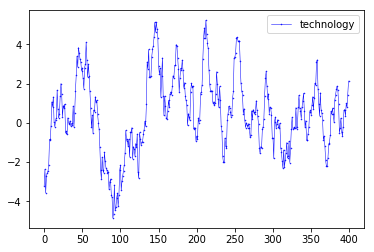

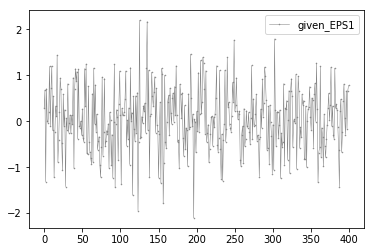

In [2]:
#   Uhlig's Exampl04.m  Model 1
#   This is  "Economy 1" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable c(t) in Exampl05

###  NOTE NOTE
### Py and MAT results match for Model 1,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 1  

lamb = 1
b = 0.64
a = 0.36                
psi =1.0/1.05 
sigma_sigma = 0.70

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']



AA = np.vstack(([0],
                          [- K_bar],
                          [0],
                          [0],
                          [0]))

BB = np.vstack(([0],
                          [(1-delta)*K_bar],
                          [alpha],
                          [0],
                          [-a*YK_bar]))

CC = np.vstack(([-C_bar, Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, 0, I_bar],
                           [0, -1, betta, 0, 0],
                           [-eta, 1, -1, 0, 0],
                           [0, a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0]

GG = [0]

HH = [0]

JJ = [-eta, 0, 0, 1, 0]

KK = [eta, 0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Uhlig_plot_simul_all.ipynb




